
# <center>Final Project<center>
# <center>Course: CMSC 6950 -- Fall 2023<center>
## <center>Mohammadmahdi Mirmojarabian<center>
## <center>Student Number: 202292549<center>
---
---

# About Dataset

## Context
Urban atmospheric pollutants are responsible for increasing the incidence of respiratory diseases in citizens, and some of them (e.g. benzene) are known to induce cancer in the case of
prolonged exposure.

In a case study, an Air Quality Chemical Multisensor Device was deployed on the field in an Italian city to measure the air quality over the passage of time. The output data is the responses of a gas multisensor device. The dataset can be downloaded from here: https://archive.ics.uci.edu/ml/datasets/Air+Quality.

## Content

The dataset contains 9357 rows of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a highly polluted area, at road level, within an Italian city. Data was recorded from March 2004 to February 2005 (one year), representing the longest freely available recordings of on-field deployed air quality chemical sensor device responses. Ground Truth hourly averaged concentrations for CO, Non Methanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) are provided by a co-located reference certified analyzer. Missing values are labeled with "**-200**".

## Attributes

* Date: (DD/MM/YYYY)


* Time: (HH.MM.SS)


* CO(GT):	True hourly averaged CO concentration [**mg/m^3**] (reference analyzer)


* PT08.S1(CO):	PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)


* NMHC(GT):	Non Metanic HydroCarbons concentration [**μg/m^3**] (reference analyzer)


* C6H6(GT):	True hourly averaged Benzene concentration [**μg/m^3**] (reference analyzer)


* PT08.S2(NMHC):	PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)


* NOx (GT):	True hourly averaged NOx concentration [**ppb**] (reference analyzer)


* PT08.S3(NOx):	PT08.S3 (tungsten oxide) hourly averaged sensor response


* NO2(GT):	True hourly averaged NO2 concentration [**μg/m^3**] (reference analyzer)


* PT08.S4(NO2):	PT08.S4 (tungsten oxide) hourly averaged sensor response


* PT08.S5(O3):	PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)


* T:	Temperature [**°C**]


* RH:	Relative Humidity (%)


* AH:   Absolute Humidity
------------------------------------------------------------------------------------

First, we import the necessary libraries and load our data from a .csv file.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

# construct a python pandas dataframe from a csv file
df = pd.read_csv("../dataset/AirQuality.csv", sep=";", decimal=',')
#we make the panda interpret semicolon as separation and comma as the decimal parameter
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


From the exhibition above, we can find out that our raw imported database has 17 columns, 9471 entries, and the last 2 columns are fully NaN and extraly imported. So, in the next step, we do some simple haircut and cleaning to make our dataframe more usable.
______________________________________________________________________________

# Initial Data Cleaning

In [2]:
#Dropping the last 2 columns (extra & all-nan) 
df.drop(['Unnamed: 15','Unnamed: 16'], axis = 1, inplace = True)

In [3]:
#Dropping extra fully empty rows
df.drop(df.index[9357:9471], inplace = True)

In [4]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


______________________________________________________________________________
In our dataframe, the NaN data are tagged with "-200". We now replace those values with NaN.

In [5]:
#Converting "-200" data to "NaN"

df.replace(-200, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


______________________________________________________________________________
Now, we calculate the NaN percentage of each of the columns to decide which columns should be removed.

In [6]:
def NaN_Percentages(dataframe, columns):
    print(f'No. of Rows = {dataframe.shape[0]}')
    print("NaN Ratios:\n")
    for c in dataframe.columns:
        NaN_percent= 100*dataframe[c].isna().sum()/len(dataframe[c])
        print(f'{c}: %{np.round(NaN_percent, 2)}')
        
NaN_Percentages(df, columns=df.columns)

No. of Rows = 9357
NaN Ratios:

Date: %0.0
Time: %0.0
CO(GT): %17.99
PT08.S1(CO): %3.91
NMHC(GT): %90.23
C6H6(GT): %3.91
PT08.S2(NMHC): %3.91
NOx(GT): %17.52
PT08.S3(NOx): %3.91
NO2(GT): %17.55
PT08.S4(NO2): %3.91
PT08.S5(O3): %3.91
T: %3.91
RH: %3.91
AH: %3.91


______________________________________________________________________________
As it can be seen from the info above, the column "NMHC(GT)" has **%90.23** missing values; so we will drop that attribute because keeping that will not be that helpful for our analysis as predicting and filling the missing data wouldn't work 'cause there is a huge number of missing values which the low remaining data cannot properly help fill the NaNs. 

In [8]:
#Dropping NMHC(GT) column as it contains a high percentage of null values.

df.drop('NMHC(GT)', axis=1, inplace=True) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1023.5+ KB


--------------------------------------------------------------------------------------
So until this point, we have 14 columns, including dates and times, and the total number of instances are 9357. Our measurements have been recorded hourly through consecutive days. In the next step, we want to have a general visualization of the behavior of our data, how the series are distributed to assess the centrality and spread tendencies.

# Visualized Data Distribution Assessment

Some concepts about different distributions:

* A *normal distribution* is symmetrical, and its mean (average), median (midpoint), and mode (most frequent observation) are all the same. In this distribution, most data fall within 3 standard deviation of the mean value. [[reference](https://www.investopedia.com/terms/n/normaldistribution.asp)]
* *Multimodal distribution* has multi peaks.
* A *skewed distribution* is neither symmetric nor normal because the data values trail off more sharply on one side than on the other. [[reference](https://www.sciencedirect.com/topics/mathematics/skewed-distribution)] The longer tail in an asymmetrical distribution pulls the mean away from the most common values. [[reference](https://statisticsbyjim.com/basics/skewed-distribution/)]
![alternatvie text](https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png)

______________________________________________________________________________
Histograms are a good choice for almost all data types to assess the distributions. When combined with probability density plots, histograms can help us recognize the type of our distribution. Density plot is a smoothed version of the histogram and is used in the same concept.

In the following, we have defined a function so it can automatically plot both the histogram and probability density function for each of our column values on the same plot.

In [10]:

def plot_histograms_density(df, columns):
    fig, axs = plt.subplots(len(columns), 1, figsize=(20,50))
    i = 0
    for c in columns:
        df[c].hist(ax=axs[i], density=True, label="normalized histogram plot") # normalizes the density
        df[c].plot.density(ax=axs[i], label="probability density plot")
        axs[i].set(title=f"{c} probabilities VS. {c} values")
        axs[i].legend(loc="upper right")
        i+=1


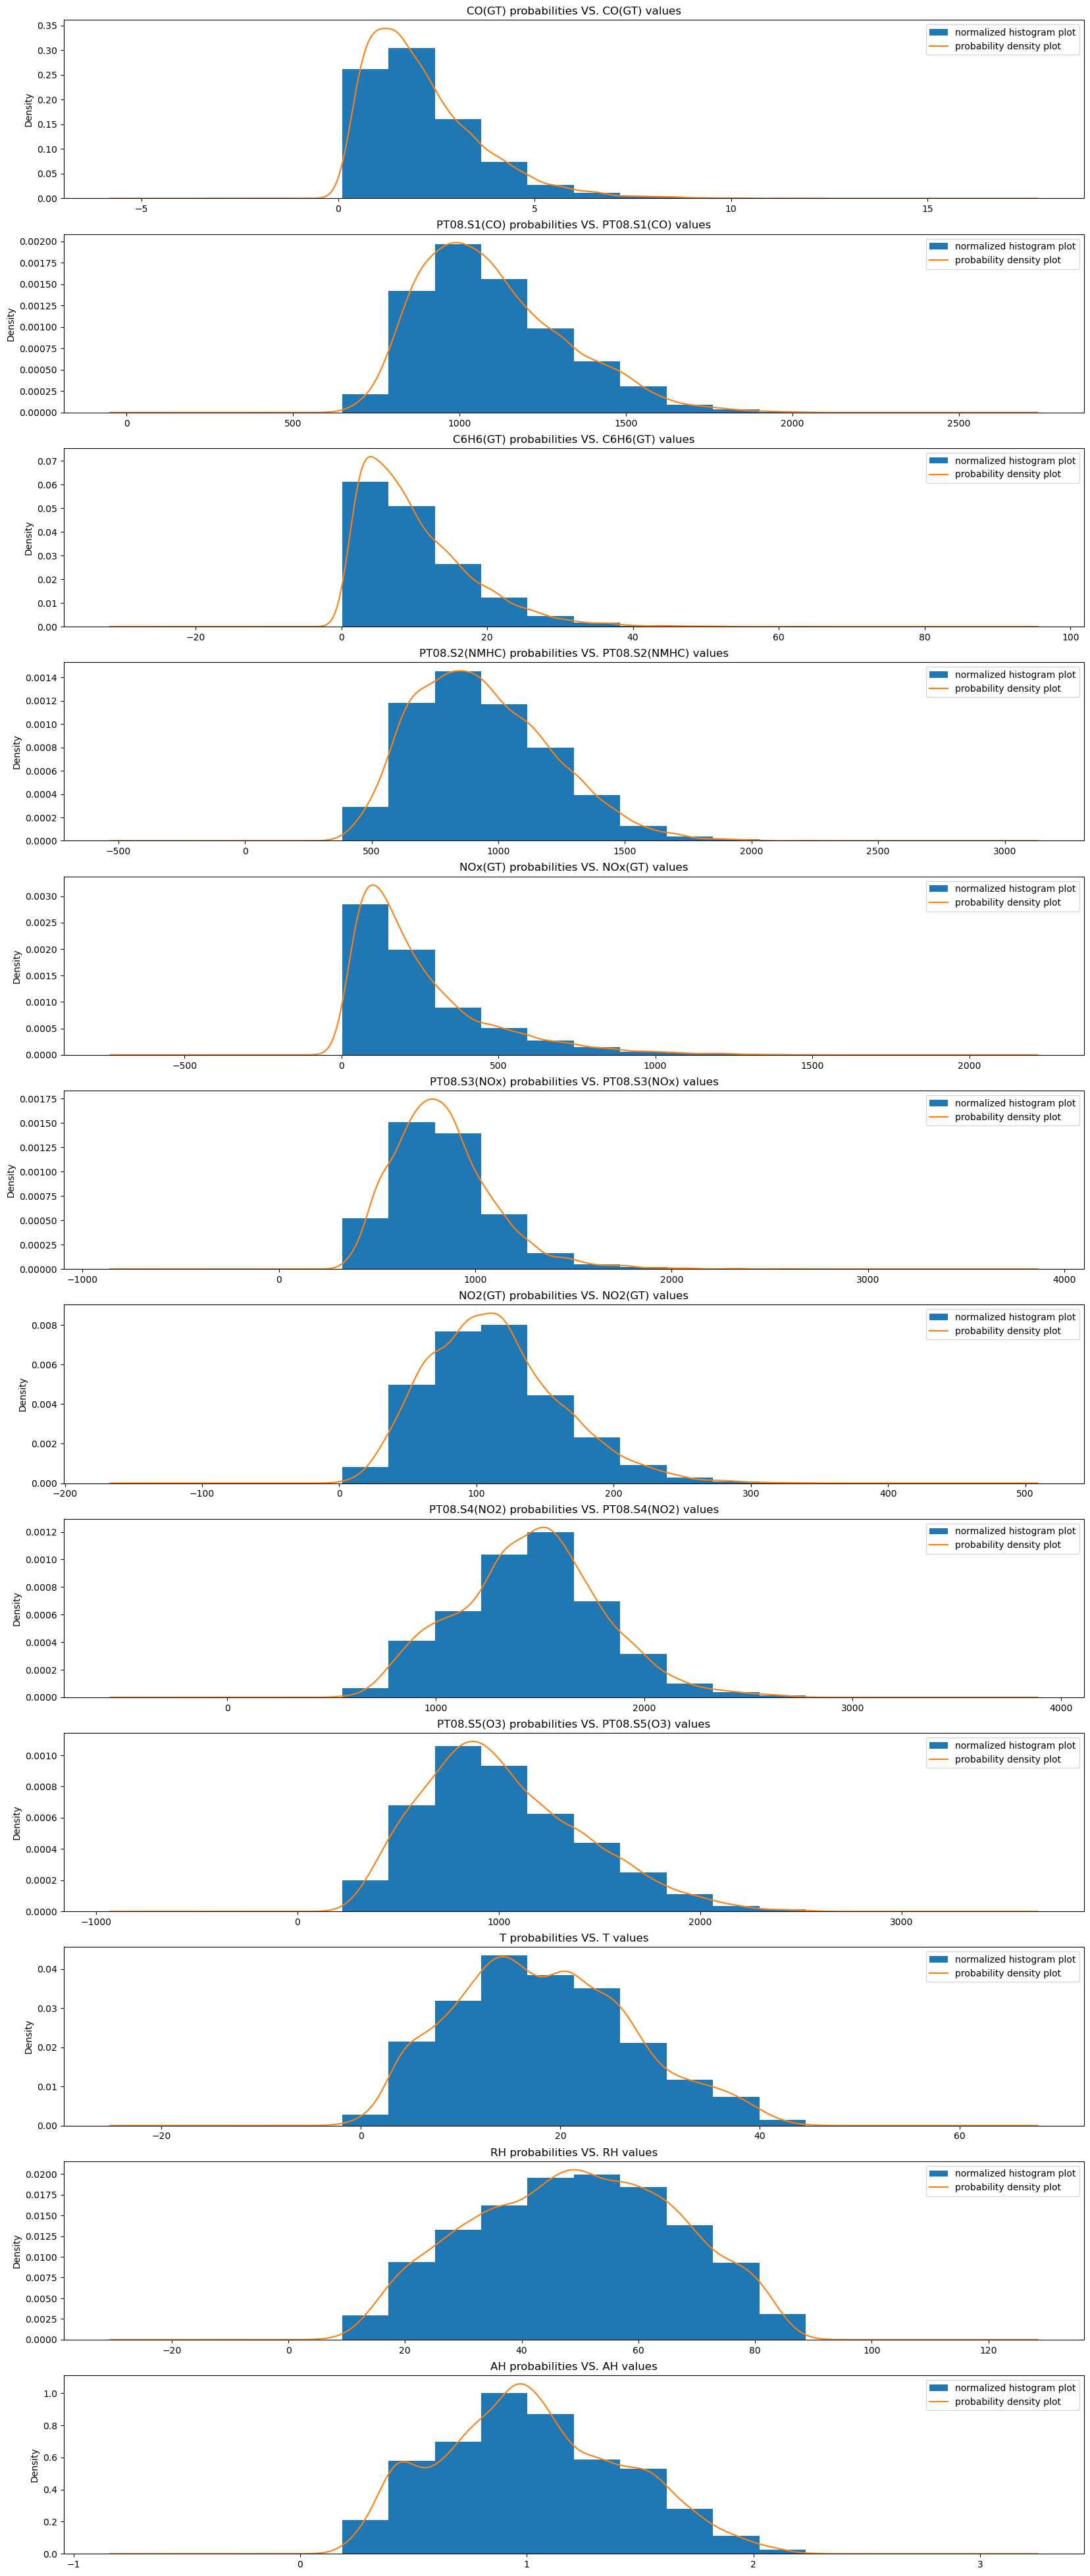

In [11]:
plot_histograms_density(df, df.columns[2:])